## Final Project Submission

Please fill out:
* Student name: Hazel Donaldson
* Student pace:  part time
* Scheduled project review date/time: June 17th, 2019
* Instructor name: Victor Geislinger
* Blog post URL:


## King County Housing Data
This dataset contains information about housing in King County from between May 2014 and May 2015. The goal of the this project is to create a house price predictive model using multiple linear regression with avaiable features in the dataset using good data science. I will be attempting to answer some of the following questions with this model: Is it worth investing in King County real estate? What zipcodes have the highest price increase overtime? 

Using the OSEMiN  method, the first step is to obtain the dataset.

# Obtain

The first step is to import the revelant libraries that I will use for this project then load the dataset to get a quick overview of what is inside.

In [1]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading and obtaining the dataset
housing = pd.read_csv('kc_house_data.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
housing.shape

(21597, 21)

Using the .shape function, I can see that the dataset has 21597 rows and 21 columns.

# Data Cleaning

The next step is to clean the data. This can mean dropping columns we do not need, dealing with null values, dealing with outliers and fixing datatypes. Looking at the head of the dataset above, I can see that the first thing to do is remove the id and date columns.

In [5]:
to_drop = list(housing)[0:1]
housing = housing.drop(to_drop, axis = 1)
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
housing.info() #checking the data types and number of enteries in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


In [7]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the datatypes and statistics of the data set, I can see some interesting things. For example, I can see that the waterfront, yr_renovated and view columns are missing some enteries. The maximum value of the bedrooms seems a bit high. For some reason the sqrt_basement column is a object datatype when the other sqft columns are integers. It's possible some of the data are strings instead of integers. I will investigate this column more closely next.

In [8]:
housing.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [9]:
housing.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
207.0         1
2720.0        1
1275.0        1
295.0         1
4820.0        1
2490.0        1
2610.0        1
417.0         1
2310.0        1
1008.0        1
1245.0        1
374.0         1
704.0         1
556.0         1
2050.0        1
935.0         1
2600.0        1
2250.0        1
518.0         1
2390.0        1
2360.0        1
2196.0        1
1284.0        1
1024.0        1
1913.0        1
666.0         1
1960.0        1
2570.0        1
1990.0        1
266.0         1
Name: sqft_basement, Len

Initially, I thought that the '?' value was a mistake but it looks as if there are 454 values that equal the question mark. So it seems to be a placeholder when the actual value was unknown. I think it would be best to remove the placeholder.

In [10]:
drop = list(housing)[11]
housing = housing.drop(drop, axis = 1)
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503


In [ ]:
#rel_prob = [.59, .01, .0096]
#prob = [i/sum(rel_prob) for i in rel_prob]
#def impute_sqft_basement(value):
    #if value == '?':
#        return np.random.choice(['500.0','600.0','700.0'], p=prob)
#    else:
#        return value
#housing.sqft_basement = housing.sqft_basement.map(lambda x: impute_sqft_basement(x))
#housing.sqft_basement.value_counts(normalize=True)

In [ ]:
#housing['sqft_basement'] = housing['sqft_basement'].astype('float') changing sq_ft basement's datatype to a float

Now that I have removed some of the columns we don't need. I will check into the null values in the dataset using the .isna().sum() function.

In [11]:
housing.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

This confirms that that waterfront, view and yr_renovated columns do have null values and will need to cleaned further. I will start with looking into the waterfront column.

In [12]:
housing.waterfront.unique() #checking the unique values in the waterfront column

array([nan,  0.,  1.])

In [13]:
housing.waterfront.value_counts() #looking at the how many value counts there are

0.0    19075
1.0      146
Name: waterfront, dtype: int64

The .value_counts() and the .unique() functions show me that there are only ones and zeros, which refer to whether a house has waterfront views (1) or a house doesn't have a waterfront view (0).My plan is to separate the dataframe into whether there is or isn't a waterfront view. This way, the null values are taken out of the column.

In [14]:
waterfront_housing = housing.loc[housing.waterfront == 1]
no_waterfront_housing = housing.loc[housing.waterfront == 0]

In [15]:
#joining the houses with waterfront views with the houses that do not have waterfront views
housing = pd.concat([waterfront_housing, no_waterfront_housing])
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,5,9,2165,1953,0.0,98070,47.4041,-122.451,2680,72513
230,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,3,7,1230,1915,1978.0,98166,47.4497,-122.375,2030,13193
246,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,3,9,1830,2000,0.0,98074,47.6338,-122.072,3120,18841
264,369900.0,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,1936,0.0,98070,47.4683,-122.438,1230,14267
300,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,3,10,2600,2002,0.0,98074,47.6053,-122.077,4550,19508


In [16]:
housing.isna().sum() #checking the number of enteries for the waterfront column

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Getting a closer look at the 5 point statistics in the .describe(), there are some interesting things going on. First there seems to be incorrect entry with the max value of 33 bedrooms in the bedrooms columns. It looks like the waterfront column is categorical or boolean because the values range from 0 to 1. The view column seems to go from 0 to 4 when the data dictionary says the values refers to if the house has been viewed. The yr_renovated column needs a lot of work. Now, I will tackle the waterfront column.

Now that the waterfront column has been dealt with. It's time to work on the yr_renovated column.

In [18]:
housing.yr_renovated.unique()

array([   0., 1978.,   nan, 1990., 2002., 1963., 2001., 2006., 1993.,
       1991., 1980., 2009., 1989., 1984., 1998., 1983., 1986., 1997.,
       1958., 1988., 1965., 1987., 2010., 1992., 2013., 1994., 2005.,
       2003., 1954., 2014., 2011., 1977., 1981., 1995., 2000., 1999.,
       1970., 2004., 2007., 1985., 1971., 1945., 1979., 1950., 1969.,
       1948., 2015., 2008., 2012., 1968., 1951., 1962., 1953., 1955.,
       1996., 1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973.,
       1957., 1959., 1960., 1967., 1934., 1972., 1944., 1974.])

For the yr_renovated column, I will do what I did for the waterfront column. Separate the dataframe between whether a house has been renovated or not.

In [19]:
no_renovation= housing.loc[housing.yr_renovated == 0] 
renovation = housing.loc[housing.yr_renovated > 0]

In [20]:
housing = pd.concat([no_renovation, renovation])
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,5,9,2165,1953,0.0,98070,47.4041,-122.451,2680,72513
246,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,3,9,1830,2000,0.0,98074,47.6338,-122.072,3120,18841
264,369900.0,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,1936,0.0,98070,47.4683,-122.438,1230,14267
300,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,3,10,2600,2002,0.0,98074,47.6053,-122.077,4550,19508
457,705000.0,3,3.00,1970,20978,2.0,1.0,3.0,4,9,1770,1980,0.0,98070,47.3844,-122.438,2280,75396


In [21]:
housing.isna().sum() #checking for null values in the yr_renovated column

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             47
condition         0
grade             0
sqft_above        0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

Now I can move onto the view column.

In [22]:
housing.view.unique() #checking the unique values in the view column

array([ 2.,  4.,  3., nan,  1.,  0.])

In [23]:
no_view = housing.loc[housing.view == 0 ]
view = housing.loc[housing.view > 0]

housing = pd.concat([no_view, view])
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1995,0.0,98003,47.3097,-122.327,2238,6819
8,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,1960,0.0,98146,47.5123,-122.337,1780,8113


Now, I will investigate the bedroom columns to see if the max value is possible.

In [ ]:
max_bedroom = housing.loc[housing.bedrooms == 33]
max_bedroom

It doesn't seem possible to have 33 bedrooms on one floor with one bathroom so, I think the best plan is to delete the row entirely.

In [ ]:
housing['bedrooms'] = housing['bedrooms'].drop(housing['bedrooms'].idxmax())
housing.describe()

In [24]:
housing.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploring Data

Now that the dataset has been clean, I can begin to explore the data more closely. The goal of exploring the dataset is to gain a better understanding of which of the features will help make the best model with the target variable. This step is done with the help of visualizations in order to interpret what the distributions look like and whether the features have a linear relationship with the target. Then I will check if the features have any correlation with each other. Finally, there should be a set of features to model against the target variable, price. I will start by looking at the distributions using the .hist() function.

## Histograms

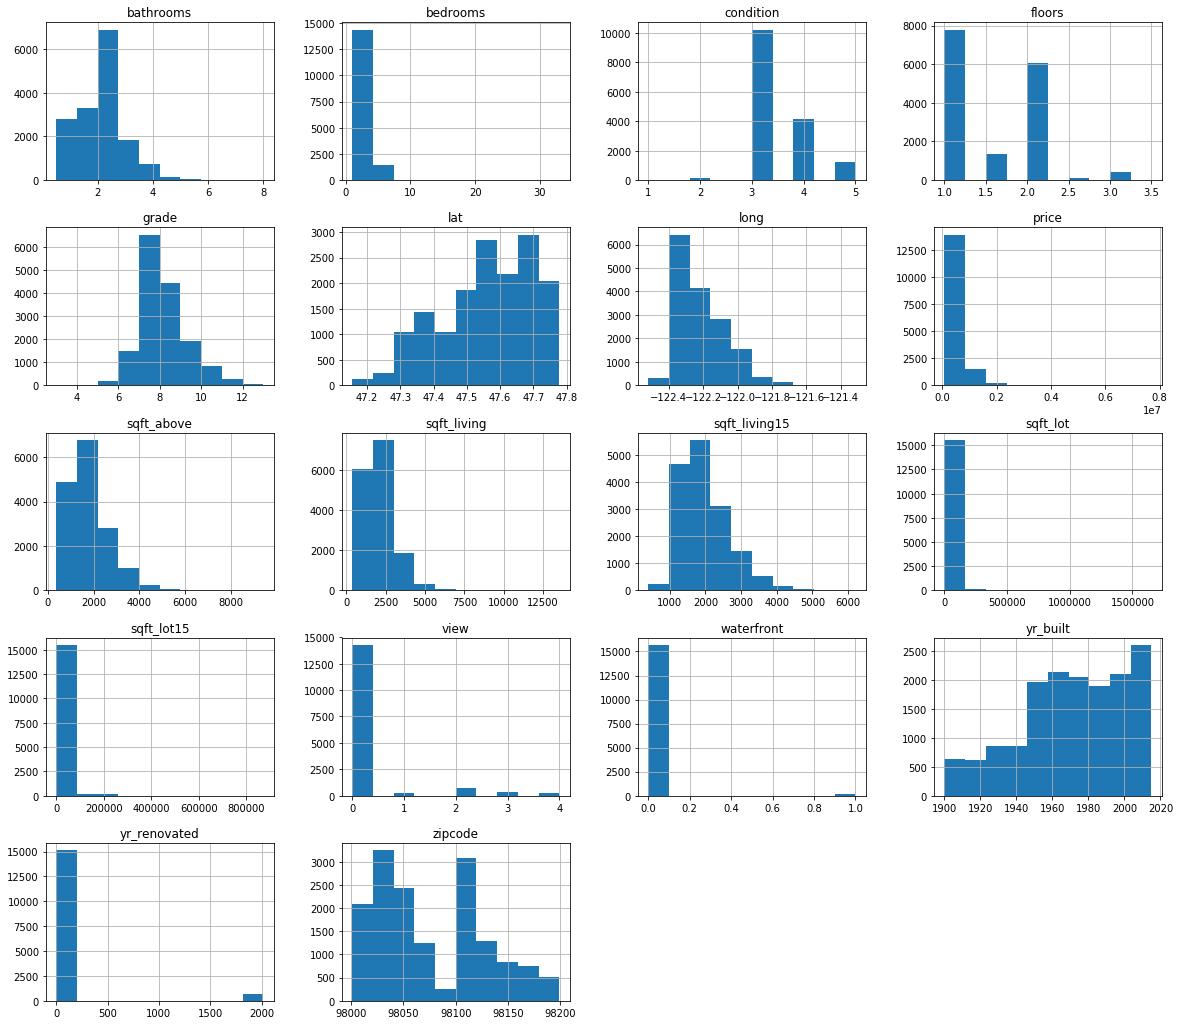

In [25]:
housing.hist(figsize = (20, 18));

Looking at these histograms, most of the data is a bit skewed. The sqft columns have long tails which may mean that those columns will need to be feature scaling. The view, waterfront and yr_renovated columns look like they are categorical. The grade and bedrooms columns look like their distribution is somewhat normal. The next step is to create some scatter plots of the feature variables against the target variable, price.

## Scatter Plots

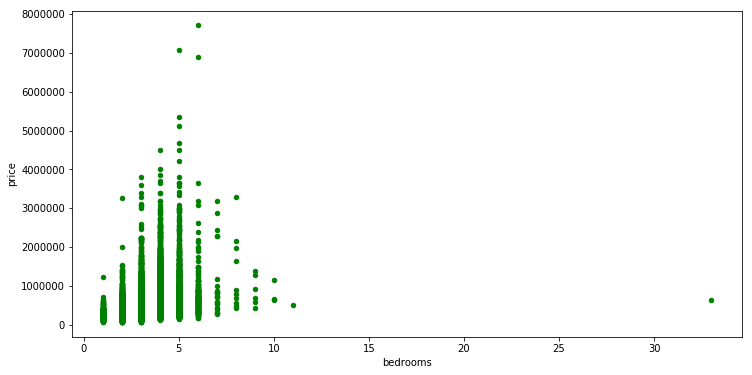

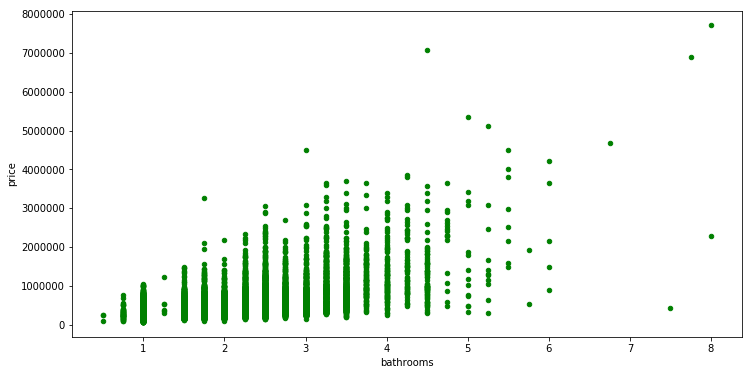

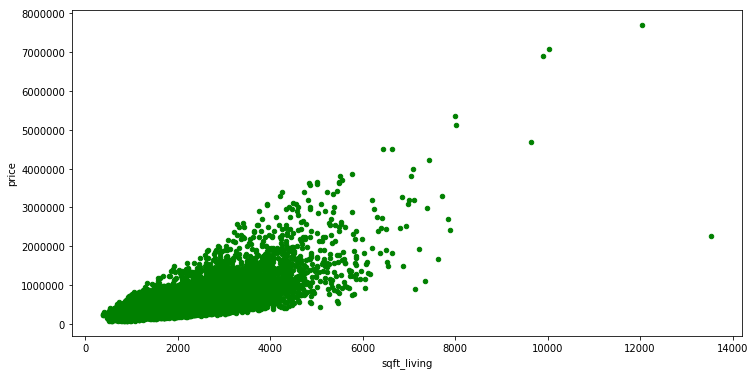

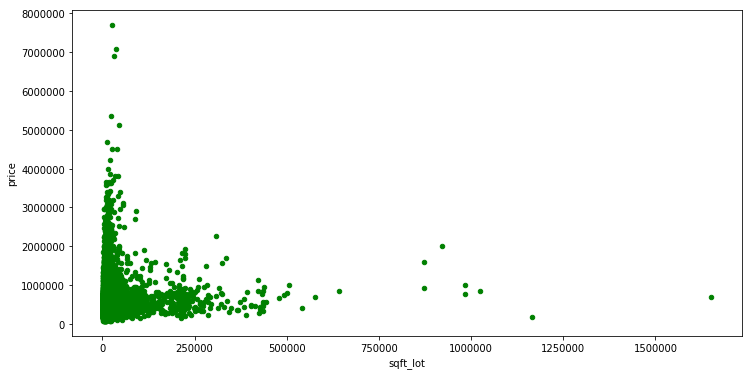

In [26]:
for column in list(housing)[1:5]:
    housing.plot(kind = 'scatter', x = column, y = 'price', color = 'g', figsize =(12, 6))
    plt.show()

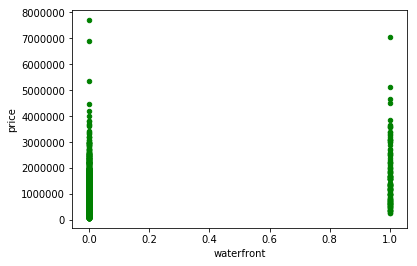

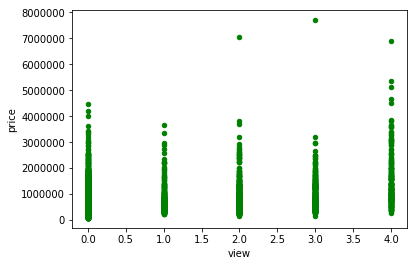

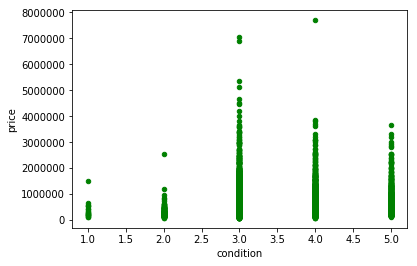

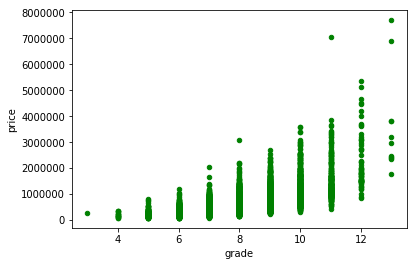

In [27]:
#fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize=(16,3))
for column in list(housing)[6:10]:
    housing.plot(kind = 'scatter', x = column, y = 'price', color = 'g')
    plt.show()

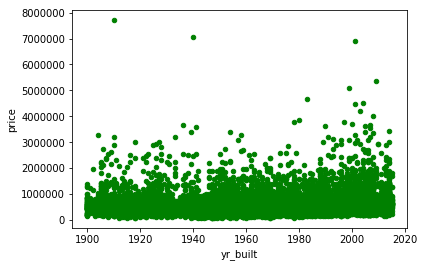

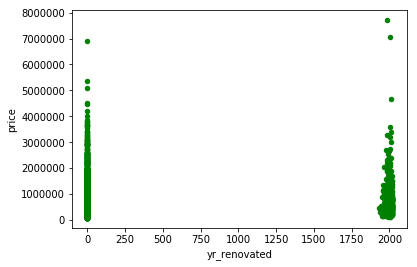

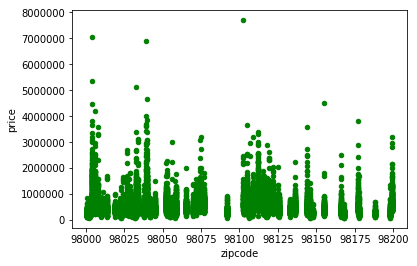

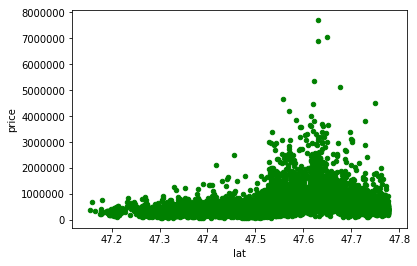

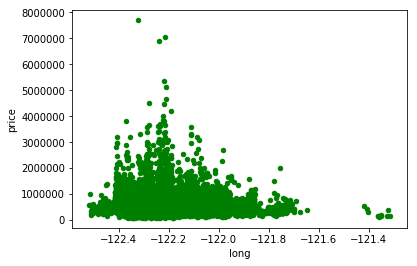

In [28]:
#fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize=(16,3))
for column in list(housing)[11:16]:
    housing.plot(kind = 'scatter', x = column, y = 'price', color = 'g')
    plt.show()

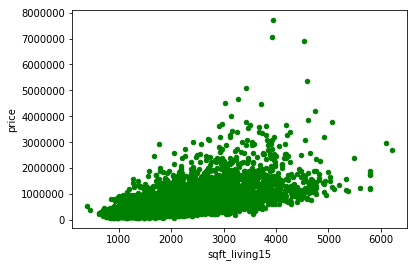

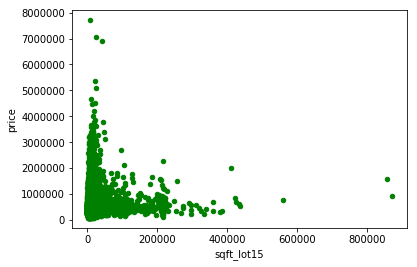

In [29]:
#fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize=(16,3))
for column in list(housing)[16:19]:
    housing.plot(kind = 'scatter', x = column, y = 'price', color = 'g')
    plt.show()

These scatter plots are telling me several things. First, it looks bedrooms, view, condition, waterfront, grade an yr_renovated are probably categorical columns. Many of the sqft, longtitude and latitude columns are linear but have a bit of cone shape. These observations suggest that one hot encoding and transformations might be needed. The tight clustering of the yr_built column could mean that binning is needed. 

## One Hot Encoding and Binning

In [ ]:
housing.yr_built.describe()

In [ ]:
bins = [1900, 1952, 1975, 1997, 2015] 
bins_yr_built = pd.cut(housing["yr_built"], bins)
bins_yr_built = bins_yr_built.cat.as_unordered()
bins_yr_built.head()

In [ ]:
bins_yr_built.value_counts().plot(kind = 'bar');

Now that categorical variables have been made into dummy variables. I can move onto see if any features need to be scaled or normalized. In order to investigate this, I will create violin plots that will give me a better picture of distribution.

## Violin Plots

From the histograms, it looked like the sqft columns had long tails which could mean log transformations. I will create some violin plots to get a closer look.

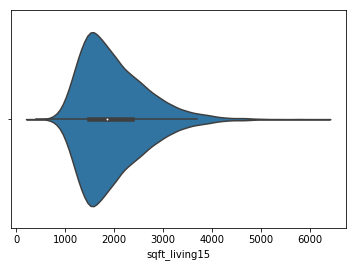

In [30]:
sns.violinplot(x= housing['sqft_living15']);

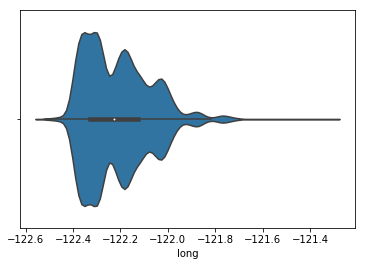

In [31]:
sns.violinplot(x = housing['long']);

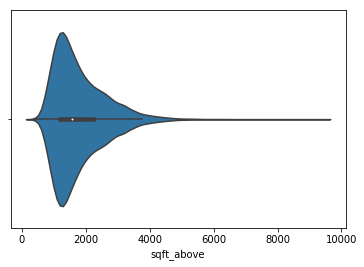

In [32]:
sns.violinplot(x = housing['sqft_above']);

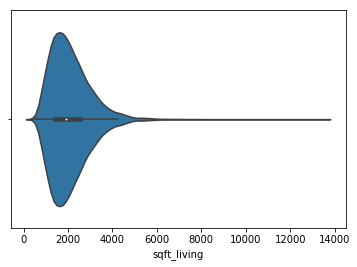

In [33]:
sns.violinplot(x = housing['sqft_living']);

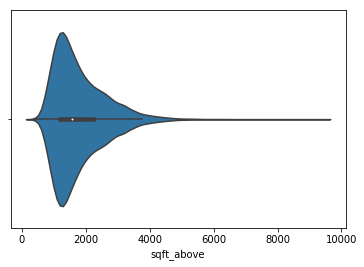

In [34]:
sns.violinplot(x = housing['sqft_above']);

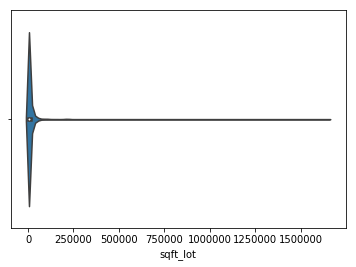

In [35]:
sns.violinplot(x = housing['sqft_lot']);

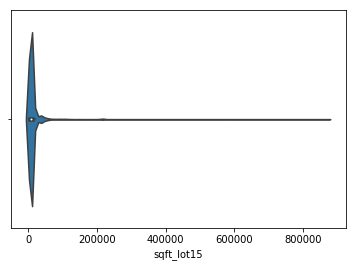

In [36]:
sns.violinplot(x = housing['sqft_lot15']);

The plots here have long tails which confirm to be that these features will need to be log transformed in the feature scaling step.

## Feature Scaling

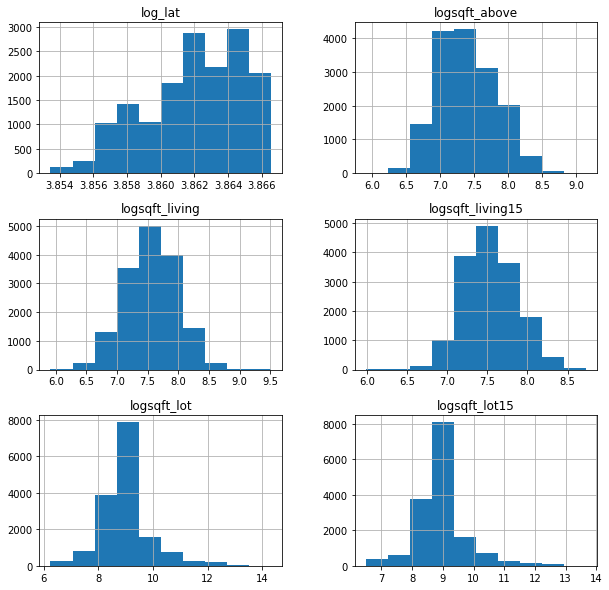

In [37]:
#Log tranformations
housing_log = pd.DataFrame([])
housing_log['logsqft_lot15'] = np.log(housing['sqft_lot15'])
housing_log['logsqft_lot'] = np.log(housing['sqft_lot'])
housing_log['logsqft_above'] = np.log(housing['sqft_above'])
housing_log['logsqft_living'] = np.log(housing['sqft_living'])
housing_log['logsqft_living15'] = np.log(housing['sqft_living15'])
housing_log['log_lat'] = np.log(housing['lat'])
housing_log.hist(figsize=(10,10));

## Multicollinearity

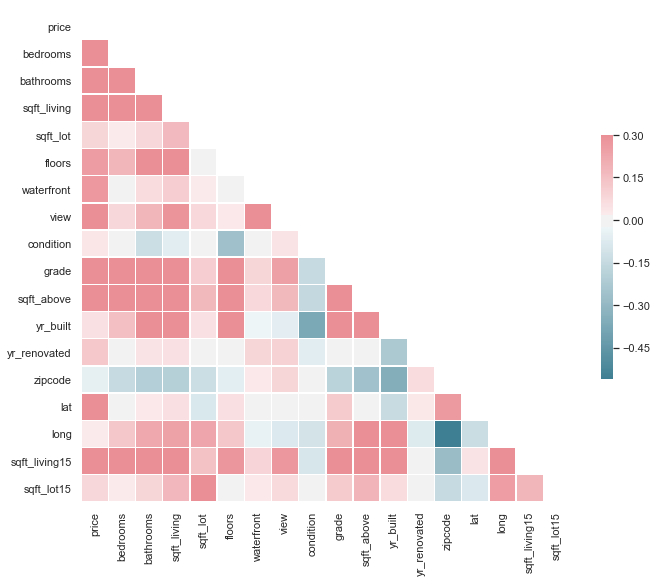

In [38]:

# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = housing.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
housing.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.305489,0.526155,0.706189,0.084504,0.259505,0.274212,0.396862,0.034367,0.664146,0.612014,0.049345,0.122731,-0.049502,0.306607,0.021215,0.581572,0.079402
bedrooms,0.305489,1.000000,0.512243,0.573575,0.025460,0.180485,-0.005833,0.080577,0.020074,0.354243,0.474272,0.153229,0.017430,-0.147255,-0.005917,0.129370,0.390720,0.025217
bathrooms,0.526155,0.512243,1.000000,0.753846,0.080362,0.505187,0.065688,0.180923,-0.130287,0.664748,0.685677,0.504841,0.046988,-0.199625,0.029930,0.222755,0.569290,0.081984
sqft_living,0.706189,0.573575,0.753846,1.000000,0.165336,0.359407,0.111491,0.285506,-0.062319,0.764251,0.876176,0.314220,0.050232,-0.196537,0.058394,0.239521,0.756676,0.176820
sqft_lot,0.084504,0.025460,0.080362,0.165336,1.000000,-0.009924,0.025982,0.077073,-0.016036,0.108950,0.174216,0.051578,0.002147,-0.129494,-0.084304,0.231638,0.145393,0.718489
floors,0.259505,0.180485,0.505187,0.359407,-0.009924,1.000000,0.018382,0.027518,-0.261013,0.459843,0.529101,0.487052,-0.000720,-0.058130,0.058190,0.129769,0.281982,-0.013571
waterfront,0.274212,-0.005833,0.065688,0.111491,0.025982,0.018382,1.000000,0.409773,0.016454,0.083034,0.077165,-0.024068,0.087800,0.030391,-0.015935,-0.042324,0.090588,0.029636
view,0.396862,0.080577,0.180923,0.285506,0.077073,0.027518,0.409773,1.000000,0.046354,0.248679,0.170726,-0.056645,0.098386,0.086479,0.008403,-0.078500,0.277778,0.071496
condition,0.034367,0.020074,-0.130287,-0.062319,-0.016036,-0.261013,0.016454,0.046354,1.000000,-0.147810,-0.157958,-0.366938,-0.060845,0.001685,-0.022250,-0.105823,-0.096336,-0.005139
grade,0.664146,0.354243,0.664748,0.764251,0.108950,0.459843,0.083034,0.248679,-0.147810,1.000000,0.758289,0.443286,0.011795,-0.184120,0.117425,0.200680,0.717031,0.116671


For mulitcollinearity, my idea is separate the data between the cutoff value I chose(0.65) and use both to see which model works better. For example, I will take the data that is with the cutoff and the data that is not with the cutoff and compare the two to see which model works better. 

In [40]:
abs(housing.corr()) > 0.65

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False


In [ ]:
#creating final features dataframe
features1 = pd.DataFrame([])
features1[

# Modeling